In [49]:
# Face Recognition using Machine Learning on Olivetti Dataset

# --- 📦 1. Upload Files ---
from google.colab import files
uploaded = files.upload()

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Saving olivetti_faces.npy to olivetti_faces (3).npy
Saving olivetti_faces_target.npy to olivetti_faces_target (3).npy


Faces shape: (400, 64, 64)
Targets shape: (400,)


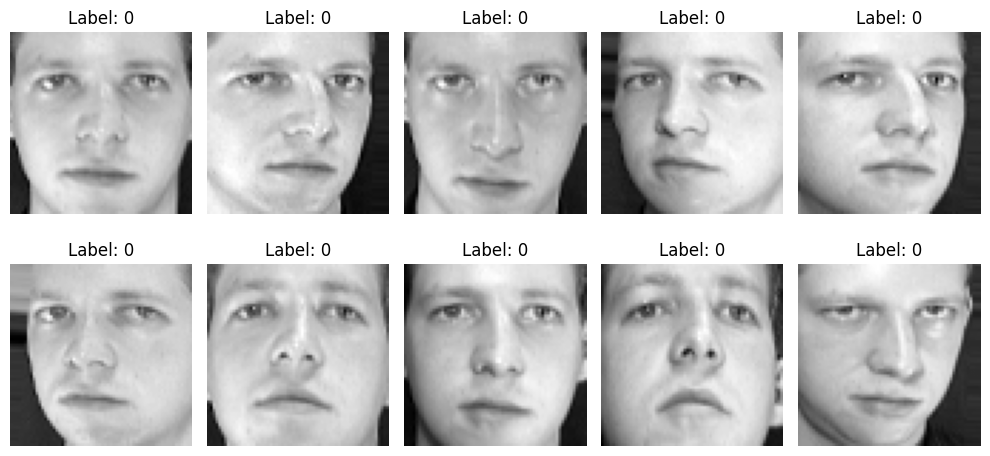

In [50]:
# --- 📂 2. Load and Explore the Dataset ---
# Load Olivetti dataset (make sure files are in the same folder or use full path)
faces = np.load('olivetti_faces.npy')
targets = np.load('olivetti_faces_target.npy')

print("Faces shape:", faces.shape)     # Expecting (400, 64, 64)
print("Targets shape:", targets.shape) # Expecting (400,)

# Display some sample faces
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces[i], cmap='gray')
    ax.set_title(f"Label: {targets[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()

In [51]:
# --- 🔄 3. Preprocessing: Flatten, Normalize, and Standardize ---
X = faces.reshape((faces.shape[0], -1)) / 255.0  # Normalize to [0, 1]
y = targets

# Standardize features for SVM
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [52]:
# --- 🔀 4. Split the Data ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [53]:
# --- 🧠 5. Apply PCA for Dimensionality Reduction ---
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("PCA components retained:", X_train_pca.shape[1])

PCA components retained: 111


In [54]:
# --- 🔍 6. SVM Classifier with Grid Search ---
param_grid = {
    'C': [1, 10, 100],
    'gamma': [0.001, 0.01, 0.1],
    'kernel': ['rbf']
}

svm_grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1)
svm_grid.fit(X_train_pca, y_train)

print("Best SVM Params:", svm_grid.best_params_)

# Evaluate best SVM model
y_pred_svm = svm_grid.predict(X_test_pca)
print("\nClassification Report - SVM with PCA")
print(classification_report(y_test, y_pred_svm))

Best SVM Params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Classification Report - SVM with PCA
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       0.50      1.00      0.67         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      1.00    

In [55]:
# --- 🌲 7. Random Forest Classifier ---
rf = RandomForestClassifier(n_estimators=200, max_depth=25, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("\nClassification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))


Classification Report - Random Forest
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      0.50      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.67      1.00      0.80         2
           8       1.00      1.00      1.00         2
           9       1.00      0.50      0.67         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         2
          15       1.00      0.50      0.67         2
          16       1.00      1.00      1.0

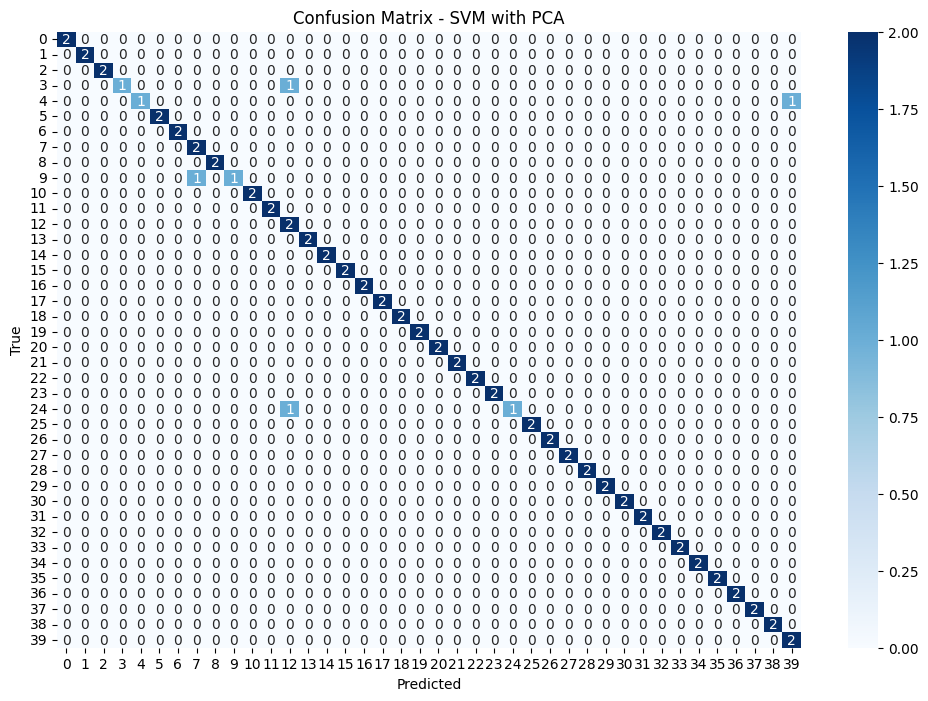

In [56]:
# --- 📊 8. Confusion Matrix - SVM + PCA ---
cm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM with PCA")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

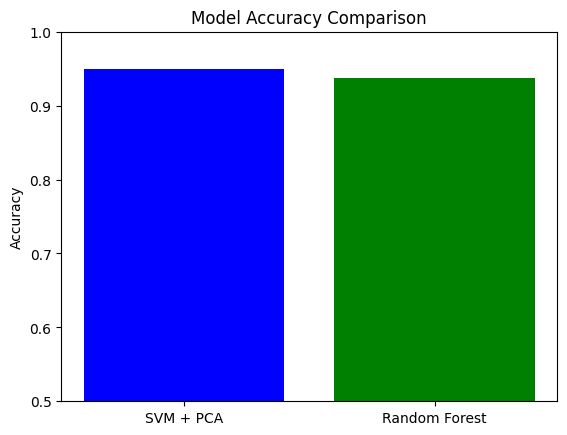

In [57]:
# --- 📈 9. Accuracy Comparison ---
acc_svm = accuracy_score(y_test, y_pred_svm)
acc_rf = accuracy_score(y_test, y_pred_rf)

plt.bar(['SVM + PCA', 'Random Forest'], [acc_svm, acc_rf], color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.5, 1.0)
plt.show()

In [58]:
# --- 🔁 10. Cross-Validation Accuracy for SVM + PCA ---
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_idx, test_idx in cv.split(X, y):
    X_tr, X_te = X[train_idx], X[test_idx]
    y_tr, y_te = y[train_idx], y[test_idx]

    X_tr_pca = pca.fit_transform(X_tr)
    X_te_pca = pca.transform(X_te)

    clf = SVC(kernel='rbf', C=svm_grid.best_params_['C'], gamma=svm_grid.best_params_['gamma'])
    clf.fit(X_tr_pca, y_tr)
    preds = clf.predict(X_te_pca)
    score = accuracy_score(y_te, preds)
    cv_scores.append(score)

print("\nCross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.9375, 0.9, 0.95, 0.9625, 0.9125]
Mean Accuracy: 0.9324999999999999


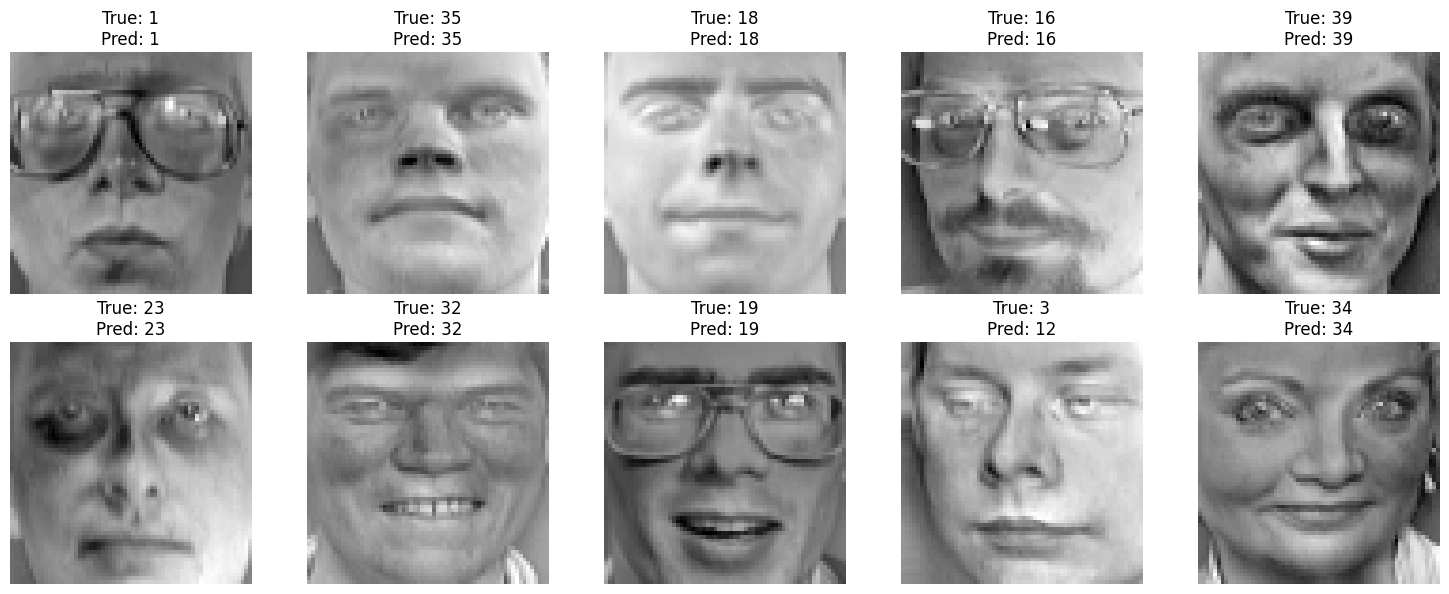

In [59]:
# --- 🖼️ 11. Show Sample Predictions (SVM + PCA) ---
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_test[i].reshape(64, 64), cmap='gray')
    ax.set_title(f"True: {y_test[i]}\nPred: {y_pred_svm[i]}")
    ax.axis('off')
plt.tight_layout()
plt.show()